# Importing the packages

In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
import warnings
import gc
import matplotlib.pyplot as plt
from scipy import stats
from matplotlib import rc_params
from sklearn import linear_model,metrics
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report 
from sklearn.preprocessing import MinMaxScaler
import matplotlib as mpl



In [28]:
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
%matplotlib inline

# 1) Reading the Data and performing Exploratory Data Analysis

In [29]:
data=pd.read_csv('Train Data.csv')

In [30]:
data.head()

,age,job,marital,education,connect,balance,landline,smart,last_day,last_month,duration,campaign,passdays,previous,poutcome,target
0,58,management,married,tertiary,no,2143,yes,no,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,5,may,76,1,-1,0,unknown,0
3,51,retired,married,primary,no,229,yes,no,5,may,353,1,-1,0,unknown,0
4,57,blue-collar,married,primary,no,52,yes,no,5,may,38,1,-1,0,unknown,0


In [31]:
data.shape

(40508, 16)

In [32]:
data.describe()

,age,balance,last_day,duration,campaign,passdays,previous,target
count,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000,40508.000000
mean,40.969488,1372.520514,15.818826,257.401229,2.768243,40.218475,0.581144,0.115854
std,10.633359,3088.652335,8.321429,255.378762,3.092290,100.061376,2.333588,0.320053
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,33.000000,73.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000
75%,48.000000,1436.250000,21.000000,318.000000,3.000000,-1.000000,0.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,58.000000,871.000000,275.000000,1.000000


## 2) Separating X(independant) and Y(target) variables

In [33]:
X=data.drop(['target'],axis=1)
Y=data['target']
X.shape

(40508, 15)

In [34]:
font_head = {'family': 'serif',
        'color':  '#c92302',
        'weight': 'normal',
        'size': 27,
        }
font_XY = {'family': 'serif',
        'color':  '#c92302',
        'weight': 'normal',
        'size': 20,
        }
colors = ['#2300A8', '#00A658']

C:\Users\REUBEN\Miniconda3\envs\minimal_ds\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



Text(0, 0.5, 'FREQUENCHY OF PURCHASE')

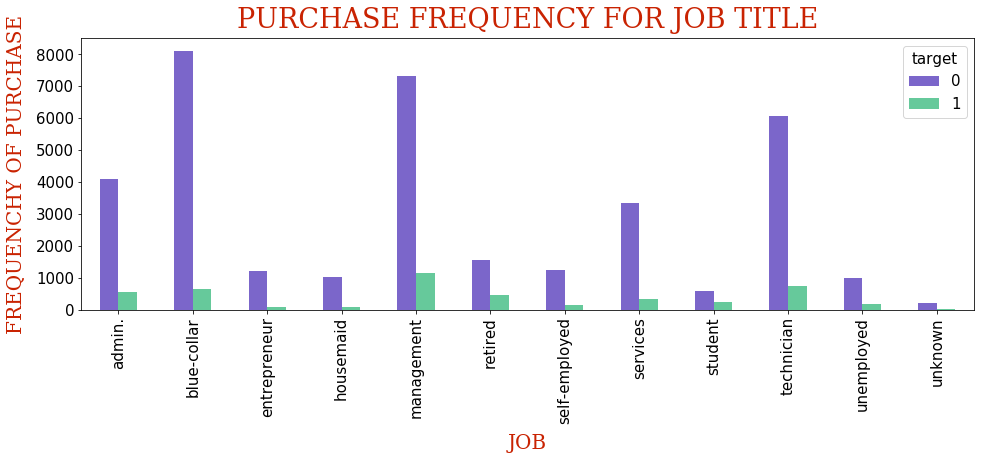

In [35]:
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
%matplotlib inline
mpl.rcParams['font.size'] = 15.0
pd.crosstab(data['job'],Y).plot(kind='bar',figsize=(16, 5),alpha=0.60,colors=colors)
plt.title('PURCHASE FREQUENCY FOR JOB TITLE',fontdict=font_head,pad=10)
plt.xlabel('JOB',fontdict=font_XY,labelpad=10)
plt.ylabel('FREQUENCHY OF PURCHASE',fontdict=font_XY,labelpad=10)

## The frequency of purchase of the deposit depends a great deal on the job title. Thus, the job title can be a good predictor of the outcome variable.

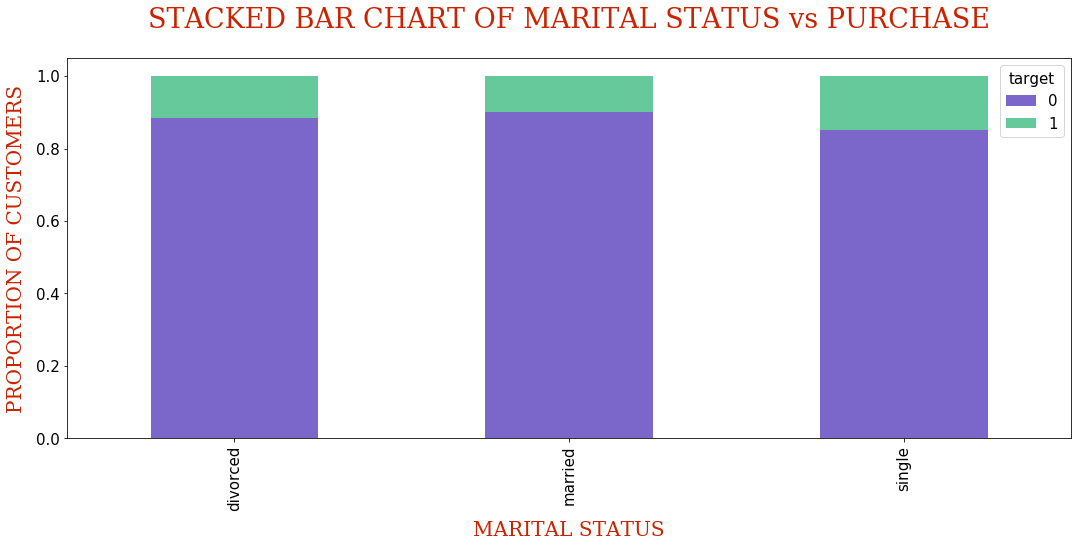

In [36]:
table=pd.crosstab(data['marital'],data['target'])
mpl.rcParams['font.size'] = 15.0
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize = (18,7),colors=colors,alpha=0.6)
plt.title('STACKED BAR CHART OF MARITAL STATUS vs PURCHASE',fontdict=font_head,pad=30)
plt.xlabel('MARITAL STATUS',fontdict=font_XY,labelpad=10)
plt.ylabel('PROPORTION OF CUSTOMERS',fontdict=font_XY,labelpad=10)
plt.savefig('mariral_vs_pur_stack')


## The marital status does not seem a strong predictor for the outcome variable.


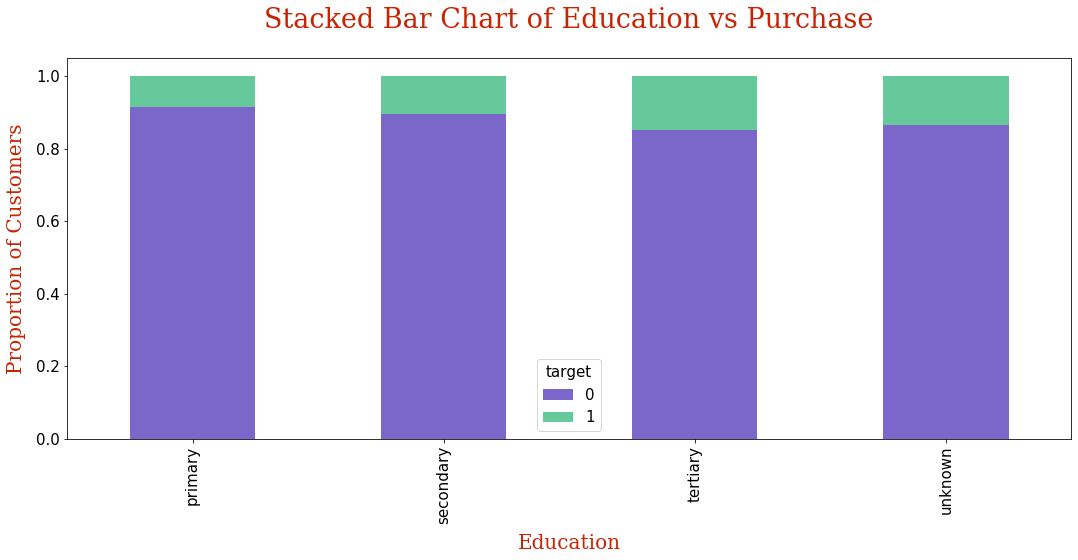

In [37]:
table=pd.crosstab(data['education'],data['target'])
mpl.rcParams['font.size'] = 15.0
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',figsize = (18,7), stacked=True,colors=colors,alpha=0.6)
plt.title('Stacked Bar Chart of Education vs Purchase',fontdict=font_head,pad=30)
plt.xlabel('Education',fontdict=font_XY,labelpad=10)
plt.ylabel('Proportion of Customers',fontdict=font_XY,labelpad=10)
plt.savefig('edu_vs_pur_stack')


## Education seems a good predictor of the outcome variable.

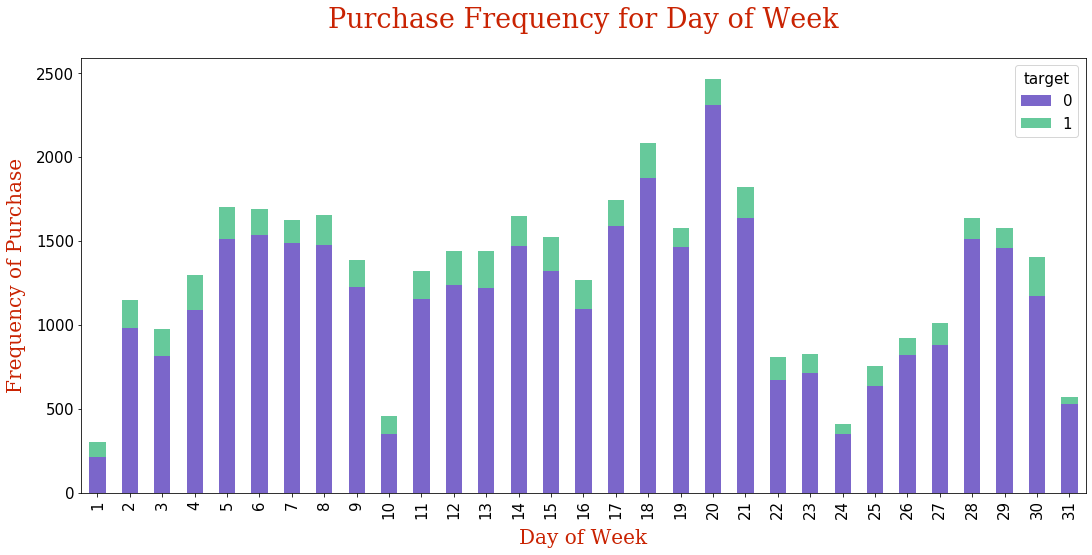

In [38]:
pd.crosstab(data['last_day'],data['target']).plot(kind='bar',figsize = (18,8), stacked=True,colors=colors,alpha=0.6)
mpl.rcParams['font.size'] = 15.0
plt.title('Purchase Frequency for Day of Week',fontdict=font_head,pad=30)
plt.xlabel('Day of Week',fontdict=font_XY,labelpad=10)
plt.ylabel('Frequency of Purchase',fontdict=font_XY,labelpad=10)
plt.savefig('pur_dayofweek_bar')


## Day of week may not be a good predictor of the outcome.


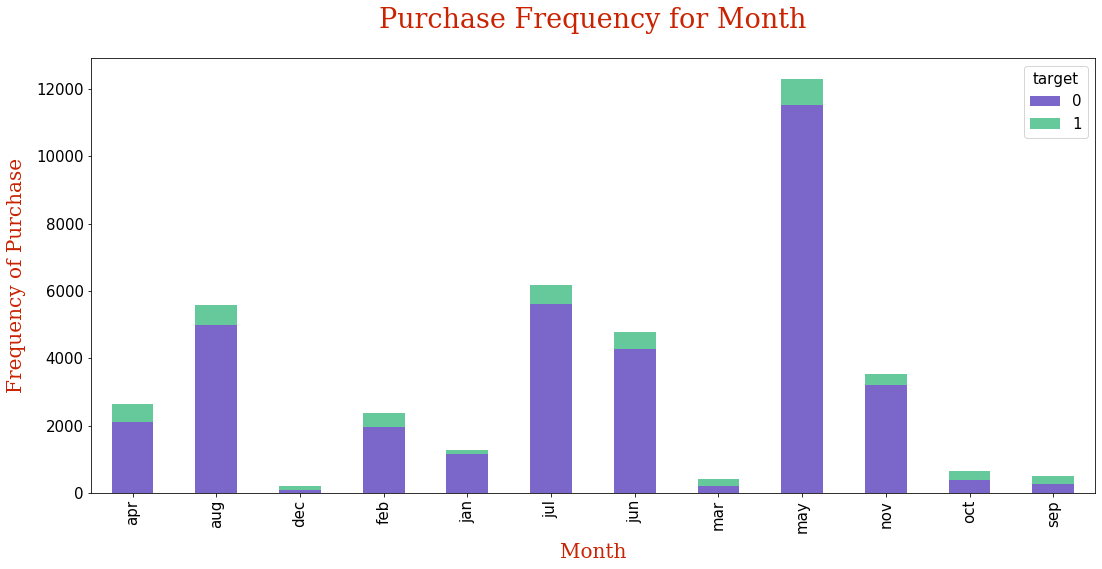

In [39]:
pd.crosstab(data['last_month'],data['target']).plot(kind='bar',figsize = (18,8), stacked=True,colors=colors,alpha=0.6)
mpl.rcParams['font.size'] = 15.0
plt.title('Purchase Frequency for Month',fontdict=font_head,pad=30)
plt.xlabel('Month',fontdict=font_XY,labelpad=10)
plt.ylabel('Frequency of Purchase',fontdict=font_XY,labelpad=10)
plt.savefig('pur_fre_month_bar')


## Month might be a good predictor of the outcome variable.

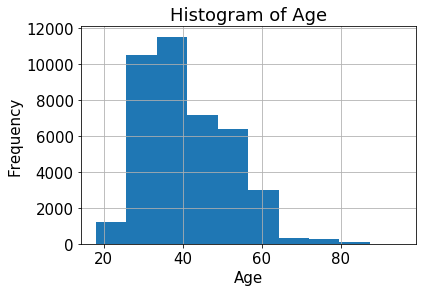

In [40]:
data['age'].hist()
mpl.rcParams['font.size'] = 15.0
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')


## Most of the customers in this dataset are in the age range of 30–40.


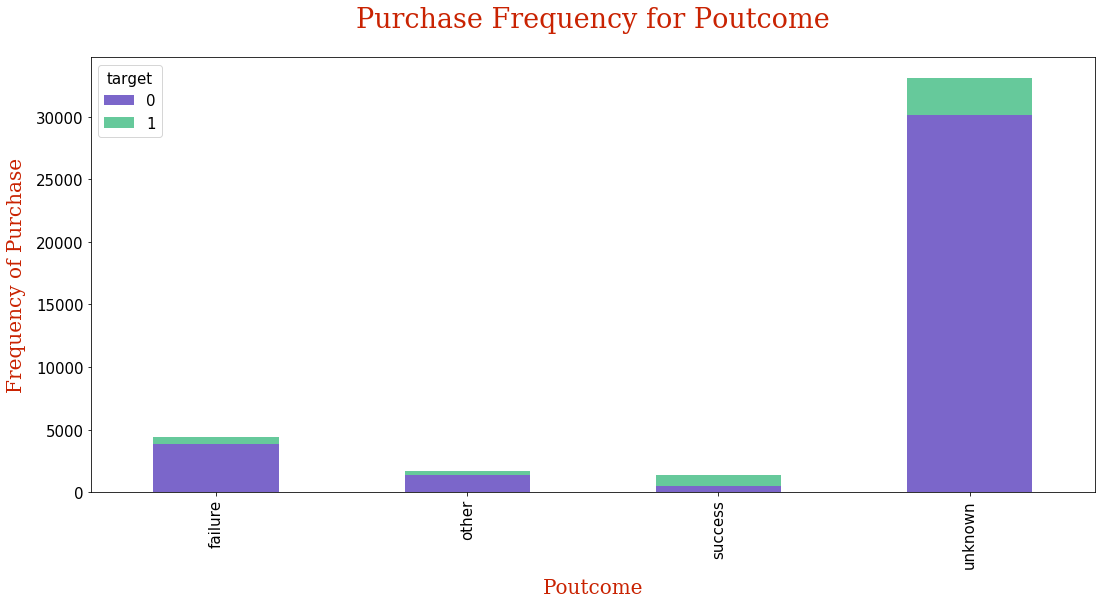

In [41]:
pd.crosstab(data['poutcome'],data['target']).plot(kind='bar',figsize = (18,8), stacked=True,colors=colors,alpha=0.6)
mpl.rcParams['font.size'] = 15.0
plt.title('Purchase Frequency for Poutcome',fontdict=font_head,pad=30)
plt.xlabel('Poutcome',fontdict=font_XY,labelpad=10)
plt.ylabel('Frequency of Purchase',fontdict=font_XY,labelpad=10)
plt.savefig('pur_fre_pout_bar')


## Poutcome seems to be a good predictor of the outcome variable

In [92]:
os_X.groupby(Y).mean()

,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,job_housemaid,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
target,,,,,,,,,,,,,,,,,,,,,
0.0,0.297017,0.084754,0.497039,0.045013,0.032470,0.042855,0.001833,0.114114,0.034064,0.028675,...,0.031998,0.157113,0.005808,0.321541,0.089460,0.010415,0.007595,0.106603,0.013681,0.840821
1.0,0.308132,0.089158,0.470467,0.108248,0.019966,0.080955,0.004250,0.118687,0.021734,0.021308,...,0.027062,0.120179,0.047731,0.167483,0.072235,0.061368,0.051566,0.118048,0.186661,0.636054


#### Observations:
1. The average age of customers who bought the data plan is higher than that of the customers who didn’t.
# 2. The passdays (days since the customer was last contacted) is understandably lower for the customers who bought it. 
# 3. The lower the passdays, the better the memory of the last call and hence the better chances of a sale. Surprisingly, campaigns (number of contacts or calls made during the current campaign) are lower for customers who bought the term deposit.


# Checking for data imbalance

In [43]:
numerical_features = ['age', 'balance','last_day','duration','campaign']

numerical_features

['age', 'balance', 'last_day', 'duration', 'campaign']

In [44]:
data['target'].value_counts()

0    35815
1     4693
Name: target, dtype: int64

### THERE IS A CLASS IMBALANCE

In [90]:
lab = Y.value_counts().keys().tolist()
mpl.rcParams['font.size'] = 15.0
#values
val = Y.value_counts().values.tolist()

trace = go.Pie(labels = lab ,
               values = val ,
               marker = dict(colors =  [ 'royalblue' ,'lime'],
                             line = dict(color = "white",
                                         width =  1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = .5
              )
layout = go.Layout(dict(title = "CLASS IMBALANCE ON TARGET VARIABLE",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                       )
                  )

data = [trace]
fig = go.Figure(data = data,layout = layout)
py.iplot(fig)

## Our classes are imbalanced, and the ratio of no-subscription to subscription instances is 89:11. 

## We'll now over-sample the dataset by using SMOTE

In [86]:
os = SMOTE(random_state=42)
os_X, os_Y = os.fit_sample(df,Y)
os_X = pd.DataFrame(data=os_X,columns=list(df))
os_Y = pd.DataFrame(data=os_Y, columns=['target'])

In [87]:
np.mean(os_Y)

target    0.5
dtype: float64

## Checking for class-imbalance again

In [88]:
os_Y['target'].value_counts()

1    35815
0    35815
Name: target, dtype: int64

### Graphical representation

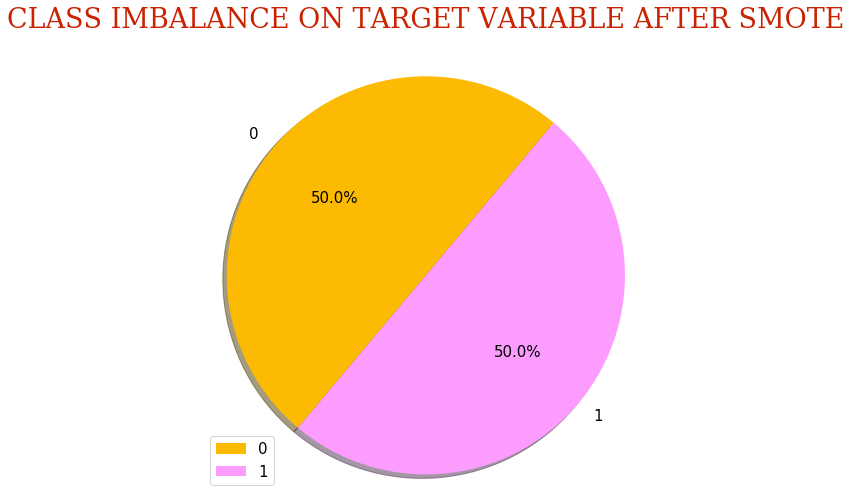

In [94]:
labels = ['0','1']
colorses = ['#fcba03', '#fd9cff']
mpl.rcParams['font.size'] = 15.0
values = ['35815','35815']
# explode = (0, 0.6, 0, 0)
fig1, ax1 = plt.subplots(figsize=(8,8))
ax1.pie(values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=50,colors = colorses)
ax1.axis('equal')  

plt.title('CLASS IMBALANCE ON TARGET VARIABLE AFTER SMOTE',fontdict=font_head,pad=30)
plt.legend(labels,loc=3)

plt.show()



# Encoding the categorical data for analysis

In [49]:
X=pd.get_dummies(X)

In [50]:
X.head()

,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_blue-collar,job_entrepreneur,...,last_month_jun,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,51,229,5,353,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,57,52,5,38,1,-1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1


In [51]:
Y

0        0
1        0
2        0
3        0
4        0
        ..
40503    1
40504    1
40505    1
40506    0
40507    0
Name: target, Length: 40508, dtype: int64

In [52]:
X.shape

(40508, 48)

In [53]:
 X.to_csv("training_X.csv")

In [54]:
Y.to_csv("test_Y.csv")

In [55]:
X.columns 


Index(['age', 'balance', 'last_day', 'duration', 'campaign', 'passdays',
       'previous', 'job_admin.', 'job_blue-collar', 'job_entrepreneur',
       'job_housemaid', 'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_divorced', 'marital_married', 'marital_single',
       'education_primary', 'education_secondary', 'education_tertiary',
       'education_unknown', 'connect_no', 'connect_yes', 'landline_no',
       'landline_yes', 'smart_no', 'smart_yes', 'last_month_apr',
       'last_month_aug', 'last_month_dec', 'last_month_feb', 'last_month_jan',
       'last_month_jul', 'last_month_jun', 'last_month_mar', 'last_month_may',
       'last_month_nov', 'last_month_oct', 'last_month_sep',
       'poutcome_failure', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [56]:
X=X.drop(['job_blue-collar'],1)

In [57]:
X=X.drop(['last_month_jun'],1)

In [58]:
X=X.drop(['poutcome_other'],1)

In [59]:
X=X.drop(['marital_divorced'],1)

In [60]:
X=X.drop(['connect_no'],1)

In [61]:
X=X.drop(['landline_no'],1)

In [62]:
X=X.drop(['smart_no'],1)

In [63]:
X=X.drop(['education_primary'],1)

In [64]:
X.shape

(40508, 40)

In [65]:
X.head()


,age,balance,last_day,duration,campaign,passdays,previous,job_admin.,job_entrepreneur,job_housemaid,...,last_month_jan,last_month_jul,last_month_mar,last_month_may,last_month_nov,last_month_oct,last_month_sep,poutcome_failure,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1
3,51,229,5,353,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
4,57,52,5,38,1,-1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1


In [66]:
X.columns 

Index(['age', 'balance', 'last_day', 'duration', 'campaign', 'passdays',
       'previous', 'job_admin.', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'connect_yes',
       'landline_yes', 'smart_yes', 'last_month_apr', 'last_month_aug',
       'last_month_dec', 'last_month_feb', 'last_month_jan', 'last_month_jul',
       'last_month_mar', 'last_month_may', 'last_month_nov', 'last_month_oct',
       'last_month_sep', 'poutcome_failure', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

# Fitting a Logit Model to the dataset

In [67]:
reg = linear_model.LogisticRegression() 

In [68]:
reg.fit(X,Y) 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [69]:
y_pred = reg.predict(X) 

In [70]:
print("Logistic Regression model accuracy(in %):",  
metrics.accuracy_score(Y, y_pred)*100) 

Logistic Regression model accuracy(in %): 90.17478029031302
